# 自动求导

In [1]:
import torch

In [5]:
x = torch.arange(4.0)

In [6]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [7]:
x.grad

In [11]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [12]:
y.backward()

In [13]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [14]:
x.grad == 4 * x

tensor([True, True, True, True])

# 概率论

In [15]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [16]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [17]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 0., 2., 3., 2.])

In [18]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts /1000

tensor([0.1730, 0.1520, 0.1730, 0.1620, 0.1580, 0.1820])

In [20]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
counts

tensor([[2., 1., 2., 2., 1., 2.],
        [1., 2., 3., 3., 0., 1.],
        [1., 0., 3., 2., 3., 1.],
        ...,
        [2., 1., 1., 3., 1., 2.],
        [1., 2., 1., 3., 1., 2.],
        [1., 1., 1., 3., 3., 1.]])

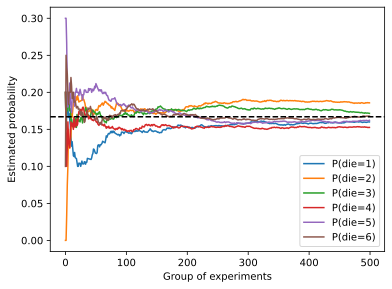

In [21]:
# 我们也可以看这些概率如何随着时间的推移收敛到真实概率
counts = multinomial.Multinomial(10, fair_probs).sample((500, )) # 进行500组实验，每组抽取10个样本
cum_counts = counts.cumsum(dim = 0)
estimates = cum_counts / cum_counts.sum(dim = 1, keepdims = True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                label = ("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y = 0.167, color = "black", linestyle = 'dashed')
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [22]:
cum_counts

tensor([[  2.,   0.,   2.,   2.,   3.,   1.],
        [  3.,   0.,   3.,   3.,   6.,   5.],
        [  5.,   1.,   6.,   3.,   8.,   7.],
        ...,
        [797., 926., 856., 760., 805., 836.],
        [799., 927., 857., 761., 808., 838.],
        [800., 929., 858., 763., 811., 839.]])

In [23]:
cum_counts.sum(dim = 1, keepdims = True)

tensor([[  10.],
        [  20.],
        [  30.],
        [  40.],
        [  50.],
        [  60.],
        [  70.],
        [  80.],
        [  90.],
        [ 100.],
        [ 110.],
        [ 120.],
        [ 130.],
        [ 140.],
        [ 150.],
        [ 160.],
        [ 170.],
        [ 180.],
        [ 190.],
        [ 200.],
        [ 210.],
        [ 220.],
        [ 230.],
        [ 240.],
        [ 250.],
        [ 260.],
        [ 270.],
        [ 280.],
        [ 290.],
        [ 300.],
        [ 310.],
        [ 320.],
        [ 330.],
        [ 340.],
        [ 350.],
        [ 360.],
        [ 370.],
        [ 380.],
        [ 390.],
        [ 400.],
        [ 410.],
        [ 420.],
        [ 430.],
        [ 440.],
        [ 450.],
        [ 460.],
        [ 470.],
        [ 480.],
        [ 490.],
        [ 500.],
        [ 510.],
        [ 520.],
        [ 530.],
        [ 540.],
        [ 550.],
        [ 560.],
        [ 570.],
        [ 580.],
        [ 590.